<a href="https://colab.research.google.com/github/shreya-rawal/notebooks/blob/main/nba_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use the NBA API to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the GSW won or lost for each game. If they win by 3 points we give them 3, or if they lose by 2 points we give them -2.

In [1]:
!pip install nba_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.3/257.3 kB 4.1 MB/s eta 0:00:00


In [2]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [3]:
#https://pypi.org/project/nba-api/

In [4]:
nba_teams = teams.get_teams() # this method will return a dictionary

In [9]:
#lets convert the teams into a dataframe to make things easier
import pandas as pd
df = pd.DataFrame(nba_teams)
df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [15]:
#lets find the teams that we are interested in ie Golden State Warriors and Toronto Rapters
!pip install sqlalchemy

In [22]:
import sqlalchemy

In [23]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [24]:
engine = sqlalchemy.create_engine('sqlite:///mydatabase.db') #create a sqllite connection

In [26]:
%sql sqlite:///mydatabase.db

In [27]:
df.to_sql('data', con=engine, if_exists='replace')

30

In [36]:
%sql SELECT * FROM data;
warriors_id = %sql SELECT CAST(id as INT) FROM data WHERE full_name LIKE '%Warriors%';
raptors_id = %sql SELECT CAST(id as INT) FROM data WHERE full_name LIKE '%Raptors%'

 * sqlite:///mydatabase.db
Done.
 * sqlite:///mydatabase.db
Done.
 * sqlite:///mydatabase.db
Done.


In [46]:
df_warriors=df[df['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [47]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information
id_warriors

1610612744

The function Leage Game Finder will make a an API Call

In [48]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.\
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>game finder</code>.


In [50]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [60]:
#get the json file as result
#gamefinder.get_json()

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column <code>MATCHUP</code> has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors. <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.


In [55]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612744,GSW,Golden State Warriors,1522300062,2023-07-15,GSW @ TOR,L,201,101,...,0.867,14.0,22.0,36.0,24,13,6,21,29,1.2
1,22023,1610612744,GSW,Golden State Warriors,1522300049,2023-07-13,GSW vs. HOU,L,200,101,...,0.692,11.0,34.0,45.0,26,7,1,22,22,-12.0
2,22023,1610612744,GSW,Golden State Warriors,1522300039,2023-07-12,GSW @ DAL,L,217,96,...,0.771,14.0,37.0,51.0,21,3,2,17,33,-2.0
3,22023,1610612744,GSW,Golden State Warriors,1522300024,2023-07-09,GSW vs. NOP,L,201,86,...,0.839,8.0,28.0,36.0,17,4,0,15,29,-10.6
4,22023,1610612744,GSW,Golden State Warriors,1522300008,2023-07-07,GSW @ LAL,L,200,96,...,0.600,15.0,31.0,46.0,24,6,4,18,27,-5.8


We can create two dataframes, one for the games that the Warriors faced the raptors at home, and the second for away games.


In [56]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

We can calculate the mean for the column <code>PLUS_MINUS</code> for the dataframes <code>games_home</code> and <code> games_away</code>:


In [57]:
games_home['PLUS_MINUS'].mean()

3.967741935483871

In [58]:
games_away['PLUS_MINUS'].mean()

-2.24375

We can plot out the <code>PLUS MINUS</code> column for the dataframes <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.


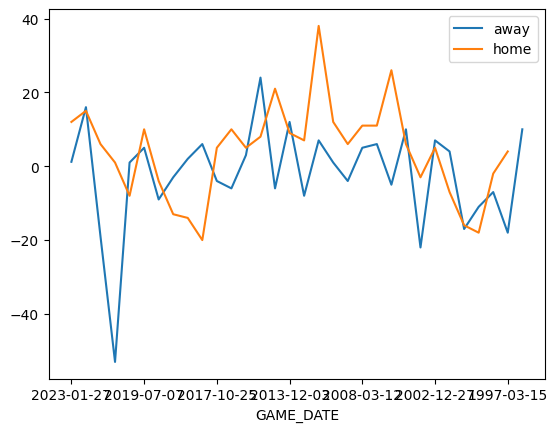

In [59]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

We can see that the warriors played better at home